In [1]:
import numpy as np
 
import pandas as pd

import seaborn as sns

import mesa

In [5]:
class MoneyAgent(mesa.Agent):
    #An agent with fixed initial wealth.

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1

In [6]:
class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n=10, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n
        # Create agents
        MoneyAgent.create_agents(model=self, n=n)

In [ ]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's attribute and set the initial values.
        self.wealth = 1

    def say_hi(self):
        # The agent's step will go here.
        # For demonstration purposes we will print the agent's unique_id
        print(f"Hi, I am an agent, you can call me {self.unique_id!s}.")


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n=10, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n

        # Create n agents
        MoneyAgent.create_agents(model=self, n=n)

    def step(self):
        """Advance the model by one step."""
        # This function psuedo-randomly reorders the list of agent objects and
        # then iterates through calling the function passed in as the parameter
        self.agents.shuffle_do("say_hi")

In [40]:
starter_model = MoneyModel(10)
starter_model.step()

Hi, I am an agent, you can call me 1.
Hi, I am an agent, you can call me 2.
Hi, I am an agent, you can call me 3.
Hi, I am an agent, you can call me 4.
Hi, I am an agent, you can call me 5.
Hi, I am an agent, you can call me 6.
Hi, I am an agent, you can call me 7.
Hi, I am an agent, you can call me 8.
Hi, I am an agent, you can call me 9.
Hi, I am an agent, you can call me 10.


In [44]:
starter_model.step()

Hi, I am an agent, you can call me 1.
Hi, I am an agent, you can call me 2.
Hi, I am an agent, you can call me 3.
Hi, I am an agent, you can call me 4.
Hi, I am an agent, you can call me 5.
Hi, I am an agent, you can call me 6.
Hi, I am an agent, you can call me 7.
Hi, I am an agent, you can call me 8.
Hi, I am an agent, you can call me 9.
Hi, I am an agent, you can call me 10.


In [47]:
#Exercise: Modifying the code below to have every agent print out its wealth when it is activated.

class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1

    def say_wealth(self):
        # The agent's step will go here.
        # FIXME: need to print the agent's wealth
        if(self.wealth != 0):
            print(f"Hi, I am an agent and my wealth is {self.wealth!s}")
        else:
            print("Hi, I am an agent and I am broke!")

In [51]:
class MoneyModel(mesa.Model):

    def __init__(self, n=10, seed = None):
        super().__init__(seed = seed)
        self.num_agents = n

        MoneyAgent.create_agents(model=self, n=n)
    
    def step(self):
        self.agents.do("say_wealth")


In [57]:
test_model = MoneyModel(12)
test_model.step()

Hi, I am an agent and my wealth is 1
Hi, I am an agent and my wealth is 1
Hi, I am an agent and my wealth is 1
Hi, I am an agent and my wealth is 1
Hi, I am an agent and my wealth is 1
Hi, I am an agent and my wealth is 1
Hi, I am an agent and my wealth is 1
Hi, I am an agent and my wealth is 1
Hi, I am an agent and my wealth is 1
Hi, I am an agent and my wealth is 1
Hi, I am an agent and my wealth is 1
Hi, I am an agent and my wealth is 1


In [73]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1

    def exchange(self):
        # Verify agent has some wealth
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.agents)
            if other_agent is not None:
                other_agent.wealth += 1
                self.wealth -= 1


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n=10):
        super().__init__()
        self.num_agents = n

        # Create agents
        MoneyAgent.create_agents(model=self, n=n)

    def step(self):
        """Advance the model by one step."""
        # This function psuedo-randomly reorders the list of agent objects and
        # then iterates through calling the function passed in as the parameter
        self.agents.shuffle_do("exchange")

In [77]:
model = MoneyModel(10)  # Tells the model to create 10 agents
for _ in range(30):  # Runs the model for 30 steps;
    model.step()

# Note: An underscore is common convention for a variable that is not used.

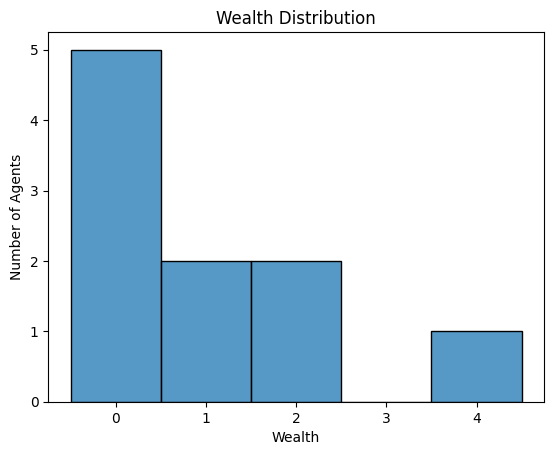

In [78]:
agent_wealth = [a.wealth for a in model.agents]
# Create a histogram with seaborn
g = sns.histplot(agent_wealth, discrete=True)
g.set(
    title="Wealth Distribution", xlabel="Wealth", ylabel="Number of Agents"
);  # The semicolon is just to avoid printing the object representation

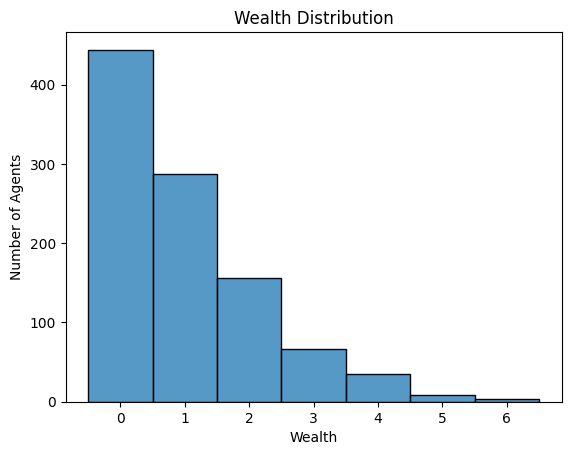

In [82]:
all_wealth = []
# This runs the model 100 times, each model executing 30 steps.
for _ in range(100):
    # Run the model
    model = MoneyModel(10)
    for _ in range(30):
        model.step()

    # Store the results
    for agent in model.agents:
        all_wealth.append(agent.wealth)

# Use seaborn
g = sns.histplot(all_wealth, discrete=True)
g.set(title="Wealth Distribution", xlabel="Wealth", ylabel="Number of Agents");

In [116]:
# Import Cell Agent and OrthogonalMooreGrid
from mesa.discrete_space import CellAgent, OrthogonalVonNeumannGrid


# Instantiate MoneyAgent as CellAgent
class MoneyAgent(CellAgent):
    """An agent with fixed initial wealth."""

    def __init__(self, model, cell):
        super().__init__(model)
        self.cell = cell  # Instantiate agent with location (x,y)
        self.wealth = 1

    # Move Function
    def move(self):
        self.cell = self.cell.neighborhood.select_random_cell()

    def give_money(self):
        cellmates = [
            a for a in self.cell.agents if a is not self
        ]  # Get all agents in cell

        if self.wealth > 0 and cellmates:
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n, width, height, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n
        # Instantiate an instance of Moore neighborhood space
        self.grid = OrthogonalVonNeumannGrid(
            (width, height), torus=True, capacity=10, random=self.random
        )

        # Create agents
        agents = MoneyAgent.create_agents(
            self,
            self.num_agents,
            # Randomly select agents cell
            self.random.choices(self.grid.all_cells.cells, k=self.num_agents),
        )

    def step(self):
        self.agents.shuffle_do("move")
        self.agents.do("give_money")

In [121]:
model = MoneyModel(100, 10, 10)
for _ in range(30):
    model.step()

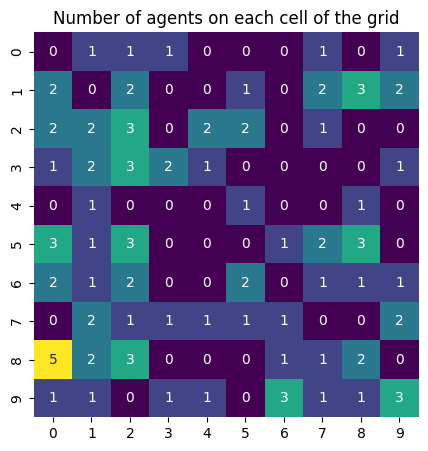

In [124]:
agent_counts = np.zeros((model.grid.width, model.grid.height))

for cell in model.grid.all_cells:
    agent_counts[cell.coordinate] = len(cell.agents)
# Plot using seaborn, with a visual size of 5x5
g = sns.heatmap(agent_counts, cmap="viridis", annot=True, cbar=False, square=True)
g.figure.set_size_inches(5, 5)
g.set(title="Number of agents on each cell of the grid");

In [89]:
# Has multi-dimensional arrays and matrices.
# Has a large collection of mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

# Data visualization tools.
import seaborn as sns

import mesa

# Import Cell Agent and OrthogonalMooreGrid
from mesa.discrete_space import CellAgent, OrthogonalMooreGrid

from mesa.batchrunner import BatchRunner

ImportError: cannot import name 'BatchRunner' from 'mesa.batchrunner' (/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/mesa/batchrunner.py)

In [88]:
class MoneyAgent(CellAgent):
    """An agent with fixed initial wealth."""

    def __init__(self, model, cell):
        super().__init__(model)
        self.cell = cell  # Instantiate agent with location (x,y)
        self.wealth = 1

    # Move Function
    def move(self):
        self.cell = self.cell.neighborhood.select_random_cell()

    def give_money(self):
        cellmates = [
            a for a in self.cell.agents if a is not self
        ]  # Get all agents in cell

        if self.wealth > 0 and cellmates:
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n, width, height, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n
        # Instantiate an instance of Moore neighborhood space
        self.grid = OrthogonalMooreGrid(
            (width, height), torus=True, capacity=10, random=self.random
        )

        # Create agents
        agents = MoneyAgent.create_agents(
            self,
            self.num_agents,
            # Randomly select agents cell
            self.random.choices(self.grid.all_cells.cells, k=self.num_agents),
        )

    def step(self):
        self.agents.shuffle_do("move")
        self.agents.do("give_money")

In [3]:
model = MoneyModel(100, 10, 10)
for _ in range(20):
    model.step()
# Let's make sure it worked
print(len(model.agents))

100


In [171]:
# Add function for model level collection
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.agents]
    x = sorted(agent_wealths)
    n = model.num_agents
    B = sum(xi * (n - i) for i, xi in enumerate(x)) / (n * sum(x))
    return 1 + (1 / n) - 2 * B

def compute_wealth_std(model):
    agent_wealths = [agent.wealth for agent in model.agents]
    return np.std(agent_wealths)

def gini_temporal_variance(model):
    df = model.datacollector.get_model_vars_dataframe()
    return df["Gini"].var()


class MoneyAgent(CellAgent):
    """An agent with fixed initial wealth."""

    def __init__(self, model, cell):
        super().__init__(model)
        self.cell = cell
        self.wealth = 1

    def move(self):
        self.cell = self.cell.neighborhood.select_random_cell()

    def give_money(self):
        cellmates = [a for a in self.cell.agents if a is not self]
        if not cellmates:
            return

        other = self.random.choice(cellmates)

        λ = self.model.saving_propensity

        w_i = self.wealth
        w_j = other.wealth

        if w_i <= 0 and w_j <= 0:
            return

        exchangeable = (1 - λ) * (w_i + w_j)
        ε = self.random.random()

        self.wealth = λ * w_i + ε * exchangeable
        other.wealth = λ * w_j + (1 - ε) * exchangeable

    def shock(self, p=0.01, shock_size=3):
        if self.random.random() < p:
            self.wealth += self.random.randint(-shock_size, shock_size)
            if self.wealth < 0:
                self.wealth = 0

    def grow(self, growth_rate=0.01):
        self.wealth *= (1 + growth_rate)



class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n, width, height, saving_propensity=0.0, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n
        self.saving_propensity = saving_propensity
        self.grid = OrthogonalMooreGrid(
            (width, height), torus=True, capacity=10, random=self.random
        )

        self.datacollector = mesa.DataCollector(
            model_reporters={"Gini": compute_gini},
            agent_reporters={"Wealth": "wealth"},
        )

        MoneyAgent.create_agents(
            self,
            self.num_agents,
            self.random.choices(self.grid.all_cells.cells, k=self.num_agents),
        )

    def redistribute(self, tax_rate=0.1):
        total_tax = 0

        for agent in self.agents:
            tax = tax_rate * agent.wealth
            agent.wealth -= tax
            total_tax += tax

        subsidy = total_tax / self.num_agents

        for agent in self.agents:
            agent.wealth += subsidy


    def step(self):
        self.datacollector.collect(self)

        self.agents.shuffle_do("move")
        self.agents.do("give_money")

        # Wealth growth
        self.agents.do("grow")

        # Stochastic shocks (optional)
        self.agents.do("shock")

        # Periodic redistribution
        if self.steps % 10 == 0:
            self.redistribute()
            




In [197]:
model = MoneyModel(
    n=100,
    width=10,
    height=10,
    saving_propensity=0.3,
    seed=42,
)

for _ in range(200):
    model.step()

model_df = model.datacollector.get_model_vars_dataframe()


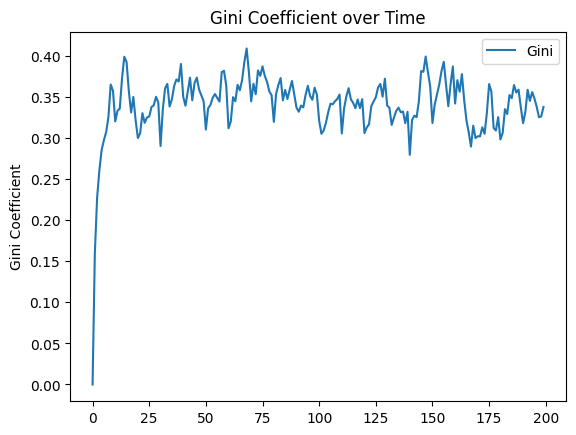

In [199]:
# Extract MoneyModel data in a Pandas dataframe
params = model.datacollector.get_model_vars_dataframe()
g = sns.lineplot(data=params)
g.set(title="Gini Coefficient over Time", ylabel="Gini Coefficient");

In [200]:
# Extract MoneyAgent data in a Pandas dataframe
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth.head()

Wealth
Step AgentID        
1    1           1.0
     2           1.0
     3           1.0
     4           1.0
     5           1.0

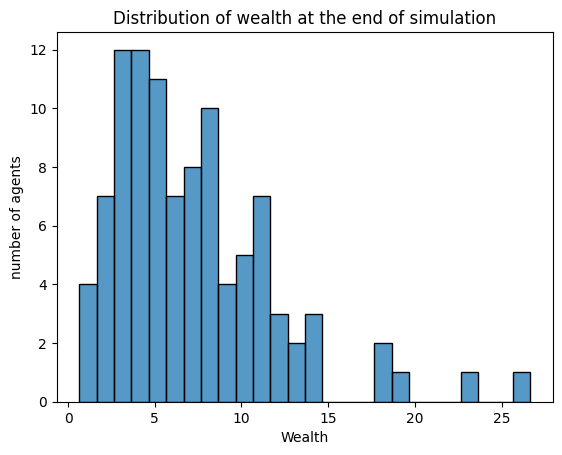

In [201]:
last_step = agent_wealth.index.get_level_values("Step").max()  # Get the last step
end_wealth = agent_wealth.xs(last_step, level="Step")["Wealth"] # Get the wealth of each agent at the last step
# Create a histogram of wealth at the last step
g = sns.histplot(end_wealth, discrete=True)
g.set(
    title="Distribution of wealth at the end of simulation",
    xlabel="Wealth",
    ylabel="number of agents",
);

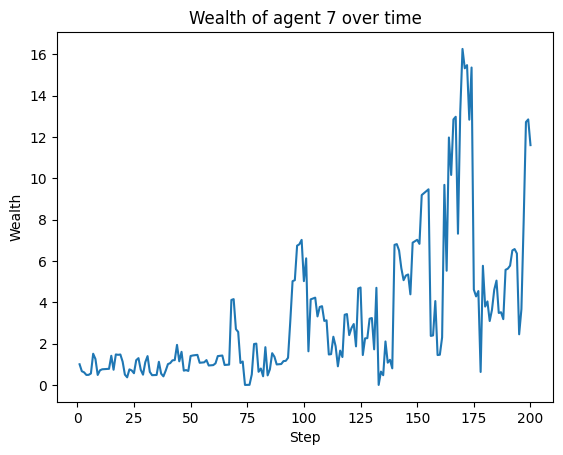

In [202]:
# Get the wealth of agent 7 over time
one_agent_wealth = agent_wealth.xs(7, level="AgentID")

# Plot the wealth of agent 7 over time
g = sns.lineplot(data=one_agent_wealth, x="Step", y="Wealth")
g.set(title="Wealth of agent 7 over time");

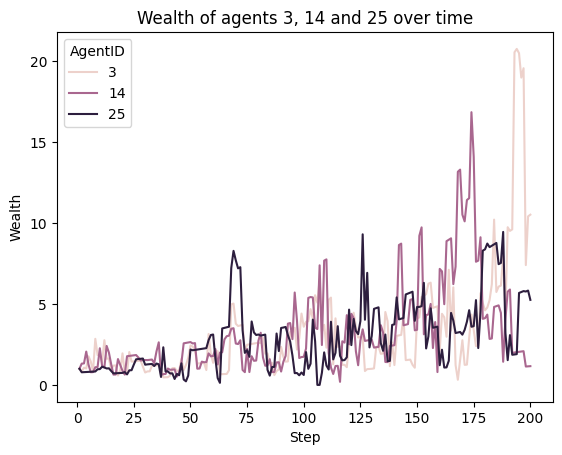

In [203]:
agent_list = [3, 14, 25]

# Get the wealth of multiple agents over time
multiple_agents_wealth = agent_wealth[
    agent_wealth.index.get_level_values("AgentID").isin(agent_list)
]
# Plot the wealth of multiple agents over time
g = sns.lineplot(data=multiple_agents_wealth, x="Step", y="Wealth", hue="AgentID")
g.set(title="Wealth of agents 3, 14 and 25 over time");

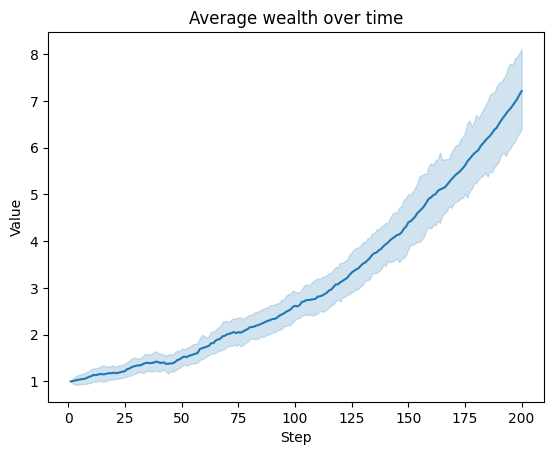

In [204]:
# Transform the data to a long format
agent_wealth_long = agent_wealth.T.unstack().reset_index()
agent_wealth_long.columns = ["Step", "AgentID", "Variable", "Value"]
agent_wealth_long.head(3)

# Plot the average wealth over time
g = sns.lineplot(data=agent_wealth_long, x="Step", y="Value", errorbar=("ci", 95))
g.set(title="Average wealth over time");

In [205]:
# save the model data (stored in the pandas gini object) to CSV
gini.to_csv("model_data.csv")

# save the agent data (stored in the pandas agent_wealth object) to CSV
agent_wealth.to_csv("agent_data.csv")

In [206]:
model_df = model.datacollector.get_model_vars_dataframe()
gini_temporal_variance = model_df["Gini"].var()
gini_temporal_std = model_df["Gini"].std()



In [207]:
results = []

saving_props = np.linspace(0.0, 0.9, 10)

for sp in saving_props:
    for run in range(10):
        model = MoneyModel(n=100, width=10, height=10, seed=run)
        model.saving_propensity = sp  # if you added this parameter

        for _ in range(100):
            model.step()

        df = model.datacollector.get_model_vars_dataframe()
        results.append({
            "saving_propensity": sp,
            "run": run,
            "GiniTemporalVar": df["Gini"].var(),
        })

results_df = pd.DataFrame(results)


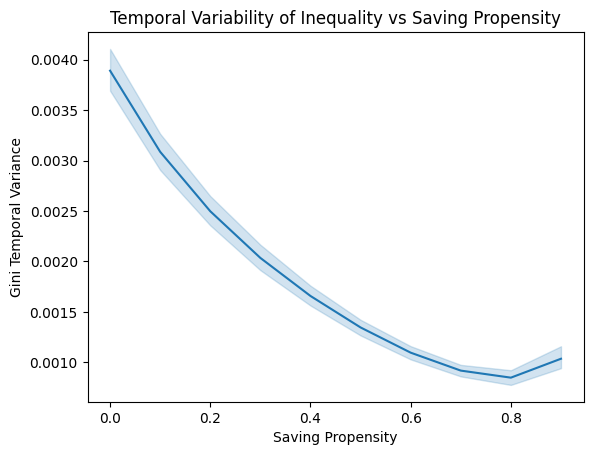

In [208]:
results.append({
    "saving_propensity": sp,
    "run": run,
    "GiniTemporalVar": df["Gini"].var(),
})
results_df = pd.DataFrame(results)
plt = sns.lineplot(
    data=results_df,
    x="saving_propensity",
    y="GiniTemporalVar",
    errorbar=("ci", 95),
)
plt.set(title = "Temporal Variability of Inequality vs Saving Propensity", xlabel="Saving Propensity", ylabel="Gini Temporal Variance"); 



In [209]:
# Has multi-dimensional arrays and matrices.
# Has a large collection of mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

# Data visualization tools.
import seaborn as sns

import mesa

In [210]:
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.agents]
    x = sorted(agent_wealths)
    n = model.num_agents
    B = sum(xi * (n - i) for i, xi in enumerate(x)) / (n * sum(x))
    return 1 + (1 / n) - 2 * B


class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        super().__init__(model)
        self.wealth = 1

    def give_money(self, poor_agents):
        if self.wealth > 0:
            other_agent = self.random.choice(poor_agents)
            other_agent.wealth += 1
            self.wealth -= 1


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n):
        super().__init__()
        self.num_agents = n

        # Create agents
        MoneyAgent.create_agents(model=self, n=n)

        self.datacollector = mesa.DataCollector(
            model_reporters={"Gini": compute_gini}, agent_reporters={"Wealth": "wealth"}
        )

    def step(self):
        self.datacollector.collect(self)
        # Get lists of rich and poor agents
        rich_agents = model.agents.select(lambda a: a.wealth >= 3)
        poor_agents = model.agents.select(lambda a: a.wealth < 3)
        # When there is rich agents only have them give money to poor agents
        if len(rich_agents) > 0:
            rich_agents.shuffle_do("give_money", poor_agents)
        else:
            poor_agents.shuffle_do("give_money", poor_agents)

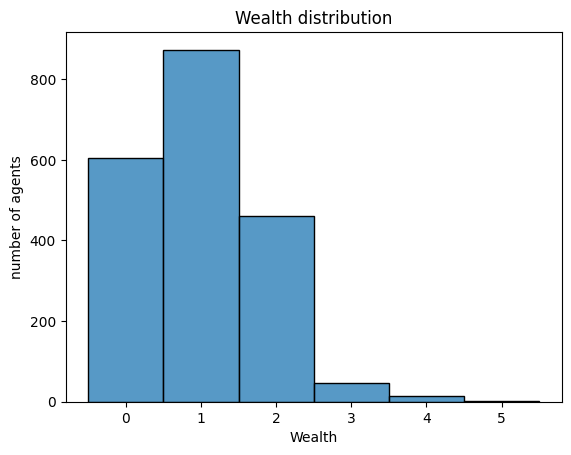

In [211]:
model = MoneyModel(100)
for _ in range(20):
    model.step()


data = model.datacollector.get_agent_vars_dataframe()
# Use seaborn
g = sns.histplot(data["Wealth"], discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");

In [9]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model, ethnicity):
        super().__init__(model)
        self.wealth = 1
        self.ethnicity = ethnicity

    def give_money(self, similars):
        if self.wealth > 0:
            other_agent = self.random.choice(similars)
            other_agent.wealth += 1
            self.wealth -= 1


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n):
        super().__init__()
        self.num_agents = n

        # Create a list of our different ethnicities
        ethnicities = ["Green", "Blue", "Mixed"]

        # Create agents
        MoneyAgent.create_agents(
            model=self,
            n=self.num_agents,
            ethnicity=self.random.choices(ethnicities, k=self.num_agents),
        )

        self.datacollector = mesa.DataCollector(
            model_reporters={"Gini": compute_gini},
            agent_reporters={"Wealth": "wealth", "Ethnicity": "ethnicity"},
        )

    def step(self):
        self.datacollector.collect(self)
        # Create dictionary of agents groupby
        grouped_agents = model.agents.groupby("ethnicity")
        for ethnic, similars in grouped_agents:
            if ethnic != "Mixed":
                similars.shuffle_do("give_money", similars)
            else:
                similars.shuffle_do(
                    "give_money", self.agents
                )  # This allows mixed to trade with anyone

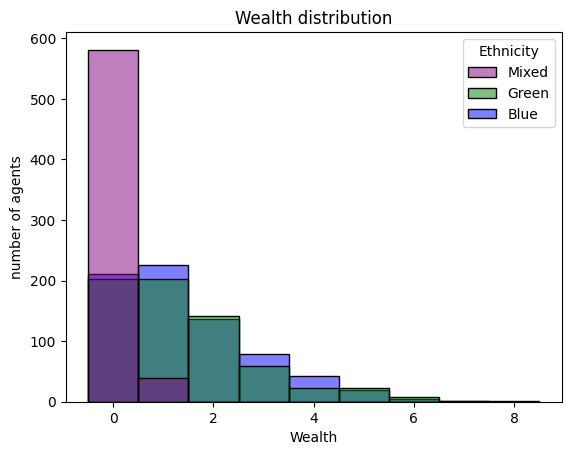

In [10]:
# Run the model
model = MoneyModel(100)
for _ in range(20):
    model.step()

# get the data
data = model.datacollector.get_agent_vars_dataframe()
# assign histogram colors
palette = {"Green": "green", "Blue": "blue", "Mixed": "purple"}
g = sns.histplot(data=data, x="Wealth", hue="Ethnicity", discrete=True, palette=palette)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");

In [11]:
# Has multi-dimensional arrays and matrices.
# Has a large collection of mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

# Data visualization tools.
import seaborn as sns

import mesa
from mesa.discrete_space import CellAgent, OrthogonalMooreGrid
from mesa.visualization import SolaraViz, SpaceRenderer, make_plot_component
from mesa.visualization.components import AgentPortrayalStyle

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/solara/validate_hooks.py:122: UserWarning: /Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/mesa/visualization/solara_viz.py:399: ComponentsView: `use_state` found despite early return on line 376
To suppress this check, replace the line with:
    current_tab_index, set_current_tab_index = solara.use_state(0)  # noqa: SH101

Make sure you understand the consequences of this, by reading about the rules of hooks at:
    https://solara.dev/documentation/advanced/understanding/rules-of-hooks

  warnings.warn(str(e))


In [12]:
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum(xi * (N - i) for i, xi in enumerate(x)) / (N * sum(x))
    return 1 + (1 / N) - 2 * B


class MoneyAgent(CellAgent):
    """An agent with fixed initial wealth."""

    def __init__(self, model, cell):
        """initialize a MoneyAgent instance.

        Args:
            model: A model instance
        """
        super().__init__(model)
        self.cell = cell
        self.wealth = 1

    def move(self):
        """Move the agent to a random neighboring cell."""
        self.cell = self.cell.neighborhood.select_random_cell()

    def give_money(self):
        """Give 1 unit of wealth to a random agent in the same cell."""
        cellmates = [a for a in self.cell.agents if a is not self]

        if cellmates:  # Only give money if there are other agents present
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1

    def step(self):
        """do one step of the agent."""
        self.move()
        if self.wealth > 0:
            self.give_money()


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n=10, width=10, height=10, seed=None):
        """Initialize a MoneyModel instance.

        Args:
            N: The number of agents.
            width: width of the grid.
            height: Height of the grid.
        """
        super().__init__(seed=seed)
        self.num_agents = n
        self.grid = OrthogonalMooreGrid((width, height), random=self.random)

        # Create agents
        MoneyAgent.create_agents(
            self,
            self.num_agents,
            self.random.choices(self.grid.all_cells.cells, k=self.num_agents),
        )

        self.datacollector = mesa.DataCollector(
            model_reporters={"Gini": compute_gini}, agent_reporters={"Wealth": "wealth"}
        )
        self.datacollector.collect(self)

    def step(self):
        """do one step of the model"""
        self.agents.shuffle_do("step")
        self.datacollector.collect(self)

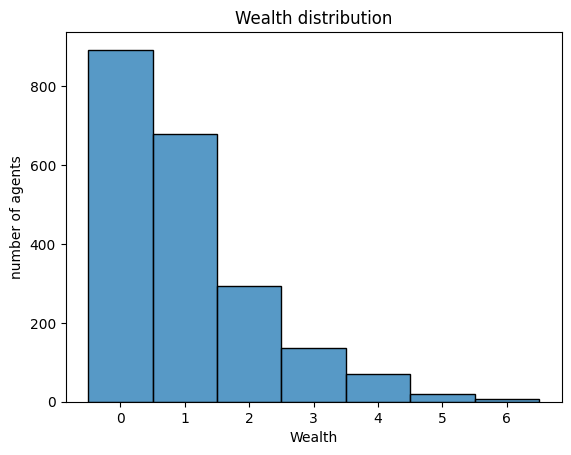

In [13]:
# Lets make sure the model works
model = MoneyModel(100, 10, 10)
for _ in range(20):
    model.step()


data = model.datacollector.get_agent_vars_dataframe()
# Use seaborn
g = sns.histplot(data["Wealth"], discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");

In [14]:
def agent_portrayal(agent):
    portrayal = AgentPortrayalStyle(size=50, color="tab:orange")
    if agent.wealth > 0:
        portrayal.update(("color", "tab:blue"), ("size", 100))
    return portrayal

In [15]:
model_params = {
    "n": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 10,
    "height": 10,
}

In [16]:
plot_comp = make_plot_component("encoding", page=1)

Cannot show ipywidgets in text

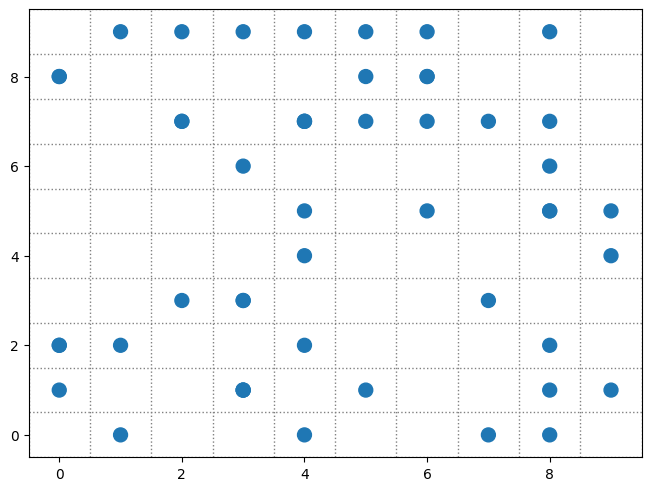

In [17]:
# Create initial model instance
money_model = MoneyModel(n=50, width=10, height=10)
renderer = SpaceRenderer(model=money_model, backend="matplotlib").render(
    agent_portrayal=agent_portrayal
)

GiniPlot = make_plot_component("Gini")

page = SolaraViz(
    money_model,
    renderer,
    components=[GiniPlot],
    model_params=model_params,
    name="Boltzmann Wealth Model",
)
# This is required to render the visualization in the Jupyter notebook
page

In [18]:
# Has multi-dimensional arrays and matrices.
# Has a large collection of mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

# Data visualization tools.
import seaborn as sns

import mesa
from mesa.discrete_space import CellAgent, OrthogonalMooreGrid
from mesa.visualization import SolaraViz, SpaceRenderer, make_plot_component
from mesa.visualization.components import AgentPortrayalStyle

In [88]:
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum(xi * (N - i) for i, xi in enumerate(x)) / (N * sum(x))
    return 1 + (1 / N) - 2 * B

def compute_wealth_std(model):
    agent_wealths = [agent.wealth for agent in model.agents]
    return np.std(agent_wealths)


class MoneyAgent(CellAgent):
    """An agent with fixed initial wealth."""

    def __init__(self, model, cell):
        """initialize a MoneyAgent instance.

        Args:
            model: A model instance
        """
        super().__init__(model)
        self.cell = cell
        self.wealth = 1

    def move(self):
        """Move the agent to a random neighboring cell."""
        self.cell = self.cell.neighborhood.select_random_cell()

    def give_money(self):
        """Give 1 unit of wealth to a random agent in the same cell."""
        cellmates = [a for a in self.cell.agents if a is not self]

        if cellmates:  # Only give money if there are other agents present
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1

    def step(self):
        """do one step of the agent."""
        self.move()
        if self.wealth > 0:
            self.give_money()


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n=10, width=10, height=10, seed=None):
        """Initialize a MoneyModel instance.

        Args:
            N: The number of agents.
            width: width of the grid.
            height: Height of the grid.
        """
        super().__init__(seed=seed)
        self.num_agents = n
        self.grid = OrthogonalMooreGrid((width, height), random=self.random)

        # Create agents
        MoneyAgent.create_agents(
            self,
            self.num_agents,
            self.random.choices(self.grid.all_cells.cells, k=self.num_agents),
        )

        self.datacollector = mesa.DataCollector(
            model_reporters={"Gini": compute_gini}, agent_reporters={"Wealth": "wealth"}
        )
        self.datacollector.collect(self)

    def step(self):
        """do one step of the model"""
        self.agents.shuffle_do("step")
        self.datacollector.collect(self)

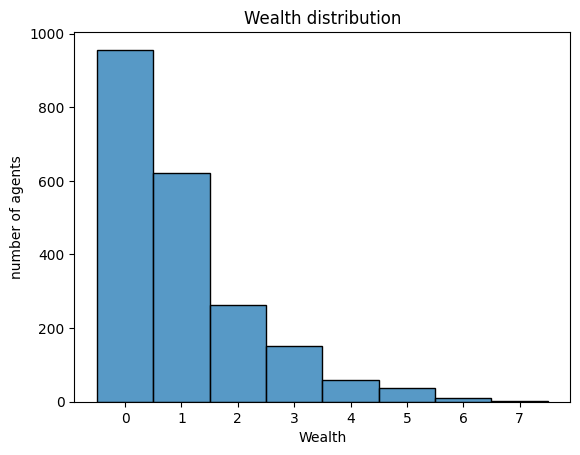

In [89]:
# Lets make sure the model works
model = MoneyModel(100, 10, 10)
for _ in range(20):
    model.step()


data = model.datacollector.get_agent_vars_dataframe()
# Use seaborn
g = sns.histplot(data["Wealth"], discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");

In [96]:
model_params = {
    "n": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 10,
    "height": 10,
}

In [97]:
plot_comp = make_plot_component("encoding", page=1)

In [98]:
def agent_portrayal(agent):
    portrayal = AgentPortrayalStyle(size=50, color="orange")
    if agent.wealth > 0:
        portrayal.update(("color", "blue"), ("size", 100))
    return portrayal


# Create initial model instance
money_model = MoneyModel(n=50, width=10, height=10)

In [99]:
%%capture

renderer = SpaceRenderer(model=money_model, backend="matplotlib")
renderer.draw_structure(lw=2, ls="solid", color="black", alpha=0.1)
renderer.draw_agents(agent_portrayal)

In [100]:
%%capture

renderer = SpaceRenderer(model=money_model, backend="altair")
renderer.draw_structure(
    xlabel="x",
    ylabel="y",
    grid_width=2,
    grid_dash=[1],
    grid_color="black",
    grid_opacity=0.1,
    title="Boltzmann Wealth Model",
)
renderer.draw_agents(agent_portrayal)

In [101]:
def post_process(ax):
    """Customize the matplotlib axes after rendering."""
    ax.set_title("Boltzmann Wealth Model")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)
    ax.set_aspect("equal", adjustable="box")


renderer.post_process = post_process

In [102]:
def post_process(chart):
    """Customize the Altair chart after rendering."""
    chart = (
        chart.properties(
            title="Boltzmann Wealth Model",
            width=600,
            height=400,
        )
        .configure_axis(
            labelFontSize=12,
            titleFontSize=14,
        )
        .configure_title(fontSize=16)
    )
    return chart


renderer.post_process = post_process

In [103]:
def post_process_lines(ax):
    """Customize the matplotlib axes for the Gini line plot."""
    ax.set_title("Gini Coefficient Over Time")
    ax.set_xlabel("Time Step")
    ax.set_ylabel("Gini Coefficient")
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)
    ax.set_aspect("auto")


GiniPlot = make_plot_component("Gini", post_process=post_process_lines)

In [104]:
page = SolaraViz(
    money_model,
    renderer,
    components=[GiniPlot],
    model_params=model_params,
    name="Boltzmann Wealth Model",
)

# This is required to render the visualization in a Jupyter notebook
page

Component react.component(solara.components.figure_altair.FigureAltair) raised exception KeyError("application/vnd.vegalite.v4+json and application/vnd.vegalite.v5+json not in mimebundle:\n\n{'application/vnd.vegalite.v6.json': {'config': {'view': {'continuousWidth': 300, 'continuousHeight': 300, 'stroke': 'black', 'strokeWidth': 1.5}, 'axis': {'labelFontSize': 12, 'titleFontSize': 14}, 'title': {'fontSize': 16}}, 'layer': [{'data': {'name': 'data-4f53cda18c2baa0c0354bb5f9a3ecbe5'}, 'mark': {'type': 'point', 'opacity': 0}, 'encoding': {'x': {'axis': {'grid': True, 'gridColor': 'black', 'gridDash': [1], 'gridOpacity': 0.1, 'gridWidth': 2}, 'field': 'X', 'scale': {'domain': [-0.5, 9.5], 'nice': False}, 'title': 'x', 'type': 'quantitative'}, 'y': {'axis': {'grid': True, 'gridColor': 'black', 'gridDash': [1], 'gridOpacity': 0.1, 'gridWidth': 2}, 'field': 'Y', 'scale': {'domain': [-0.5, 9.5], 'nice': False}, 'title': 'y', 'type': 'quantitative'}}, 'title': 'Boltzmann Wealth Model'}, {'data'

Cannot show ipywidgets in text

In [119]:
# Has multi-dimensional arrays and matrices.
# Has a large collection of mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

# Data visualization tools.
import seaborn as sns

import mesa
from mesa.discrete_space import CellAgent, OrthogonalMooreGrid
from mesa.discrete_space.property_layer import PropertyLayer
from mesa.visualization import SolaraViz, SpaceRenderer, make_plot_component
from mesa.visualization.components import AgentPortrayalStyle, PropertyLayerStyle

In [120]:
def propertylayer_portrayal(layer):
    if layer.name == "WealthDensity":
        return PropertyLayerStyle(
            colormap="viridis",
            alpha=0.6,
            colorbar=True,
            vmin=0,
            vmax=10,
        )
    elif layer.name == "Temperature":
        return PropertyLayerStyle(
            colormap="coolwarm",
            alpha=0.5,
            colorbar=False,
            vmin=-1,
            vmax=1,
        )

In [121]:
def agent_portrayal(agent):
    portrayal = AgentPortrayalStyle(size=50, color="orange")
    if agent.wealth > 0:
        portrayal.update(("color", "blue"), ("size", 100))
    return portrayal


def propertylayer_portrayal(layer):
    if layer.name == "test layer":
        return PropertyLayerStyle(color="blue", alpha=0.8, colorbar=True)


# Create initial model instance
money_model = MoneyModel(n=50, width=10, height=10)

AttributeError: module 'mesa' has no attribute 'PropertyLayer'

In [122]:
%%capture

renderer = SpaceRenderer(model=money_model, backend="matplotlib")
renderer.draw_structure(lw=2, ls="solid", color="black", alpha=0.1)
renderer.draw_agents(agent_portrayal)
renderer.draw_propertylayer(propertylayer_portrayal)

Exception: No property layers were found on the space.

In [123]:
%%capture

renderer = SpaceRenderer(model=money_model, backend="matplotlib")
renderer.render(
    space_kwargs={  # an alternative way to customize the grid structure
        "lw": 2,
        "ls": "solid",
        "color": "black",
        "alpha": 0.1,
    },
    agent_portrayal=agent_portrayal,
    propertylayer_portrayal=propertylayer_portrayal,
)

Exception: No property layers were found on the space.

In [124]:
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum(xi * (N - i) for i, xi in enumerate(x)) / (N * sum(x))
    return 1 + (1 / N) - 2 * B

def compute_wealth_std(model):
    agent_wealths = [agent.wealth for agent in model.agents]
    return np.std(agent_wealths)


class MoneyAgent(CellAgent):
    """An agent with fixed initial wealth."""

    def __init__(self, model, cell):
        """initialize a MoneyAgent instance.

        Args:
            model: A model instance
        """
        super().__init__(model)
        self.cell = cell
        self.wealth = 1

    def move(self):
        """Move the agent to a random neighboring cell."""
        self.cell = self.cell.neighborhood.select_random_cell()

    def give_money(self):
        """Give 1 unit of wealth to a random agent in the same cell."""
        cellmates = [a for a in self.cell.agents if a is not self]

        if cellmates:  # Only give money if there are other agents present
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1

    def step(self):
        """do one step of the agent."""
        self.move()
        if self.wealth > 0:
            self.give_money()


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n=10, width=10, height=10, seed=None):
        """Initialize a MoneyModel instance.

        Args:
            N: The number of agents.
            width: Width of the grid.
            height: Height of the grid.
        """
        super().__init__(seed=seed)
        self.num_agents = n
        self.grid = OrthogonalMooreGrid((width, height), random=self.random)

        # Add a test property layer with random data
        test_layer = PropertyLayer(
            "test layer", (width, height), default_value=0, dtype=int
        )
        test_layer.data = np.random.randint(0, 10, size=(width, height))
        self.grid.add_property_layer(test_layer)

        # Create agents
        MoneyAgent.create_agents(
            self,
            self.num_agents,
            self.random.choices(self.grid.all_cells.cells, k=self.num_agents),
        )

        self.datacollector = mesa.DataCollector(
            model_reporters={
                    "Gini": compute_gini,
                    "WealthStd": compute_wealth_std,
                },
            agent_reporters={"Wealth": "wealth"},
        )

        self.datacollector.collect(self)

        self.grid.add_property_layer(
            mesa.PropertyLayer(
                name="cell_wealth",
                dimensions=(width, height),
                default_value=0.0,
            )
        )

    def update_cell_wealth_layer(self):
        layer = self.grid.properties["cell_wealth"]

        # Reset layer
        layer.data[:] = 0.0

        # Accumulate wealth per cell
        for agent in self.agents:
            x, y = agent.cell.coordinate
            layer.data[x, y] += agent.wealth

    def step(self):
        self.datacollector.collect(self)

        self.agents.shuffle_do("move")
        self.agents.do("give_money")
        self.agents.do("grow")
        self.agents.do("shock")

        if self.steps % 10 == 0:
            self.redistribute()

        self.update_cell_wealth_layer()


In [125]:
# Let's make sure the model works
model = MoneyModel(100, 10, 10)
for _ in range(20):
    model.step()


data = model.datacollector.get_agent_vars_dataframe()
# Use seaborn
g = sns.histplot(data["Wealth"], discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");

AttributeError: module 'mesa' has no attribute 'PropertyLayer'

In [111]:
model_params = {
    "n": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 10,
    "height": 10,
}

In [112]:
plot_comp = make_plot_component("encoding", page=1)

In [113]:
@solara.component
def CustomComponent():
    ...

page = SolaraViz(
    model,
    renderer,
    components=[(CustomComponent, 1)]  # Custom component will appear on page 1
)

NameError: name 'solara' is not defined

In [114]:
def propertylayer_portrayal(layer):
    if layer.name == "WealthDensity":
        return PropertyLayerStyle(
            colormap="viridis",
            alpha=0.6,
            colorbar=True,
            vmin=0,
            vmax=10,
        )
    elif layer.name == "Temperature":
        return PropertyLayerStyle(
            colormap="coolwarm",
            alpha=0.5,
            colorbar=False,
            vmin=-1,
            vmax=1,
        )

In [115]:
def agent_portrayal(agent):
    portrayal = AgentPortrayalStyle(size=50, color="orange")
    if agent.wealth > 0:
        portrayal.update(("color", "blue"), ("size", 100))
    return portrayal


def propertylayer_portrayal(layer):
    if layer.name == "test layer":
        return PropertyLayerStyle(color="blue", alpha=0.8, colorbar=True)

def cell_wealth_portrayal(layer_data):
    return {
        "Color": "Reds",
        "vmin": 0,
        "vmax": 50,  # tune based on your model
    }

# Create initial model instance
money_model = MoneyModel(n=50, width=10, height=10)

AttributeError: module 'mesa' has no attribute 'PropertyLayer'

In [81]:
%%capture

renderer = SpaceRenderer(model=money_model, backend="matplotlib")
renderer.draw_structure(lw=2, ls="solid", color="black", alpha=0.1)
renderer.draw_agents(agent_portrayal)
renderer.draw_propertylayer(propertylayer_portrayal)

In [82]:
%%capture

renderer = SpaceRenderer(model=money_model, backend="matplotlib")
renderer.render(
    space_kwargs={  # an alternative way to customize the grid structure
        "lw": 2,
        "ls": "solid",
        "color": "black",
        "alpha": 0.1,
    },
    agent_portrayal=agent_portrayal,
    propertylayer_portrayal=propertylayer_portrayal,
)

In [83]:
def post_process(ax):
    """Customize the matplotlib axes after rendering."""
    ax.set_title("Boltzmann Wealth Model")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)
    ax.set_aspect("equal", adjustable="box")


renderer.post_process = post_process


def post_process_lines(ax):
    """Customize the matplotlib axes for the Gini line plot."""
    ax.set_title("Gini Coefficient Over Time")
    ax.set_xlabel("Time Step")
    ax.set_ylabel("Gini Coefficient")
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)
    ax.set_aspect("auto")


GiniPlot = make_plot_component("Gini", post_process=post_process_lines)

In [84]:
page = SolaraViz(
    money_model,
    renderer,
    components=[GiniPlot],
    model_params=model_params,
    name="Boltzmann Wealth Model",
)

# This is required to render the visualization in a Jupyter notebook
page

Cannot show ipywidgets in text

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [126]:
# Has multi-dimensional arrays and matrices.
# Has a large collection of mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

# Data visualization tools.
import seaborn as sns

import mesa
from mesa.discrete_space import CellAgent, OrthogonalMooreGrid
from mesa.discrete_space.property_layer import PropertyLayer
from mesa.visualization import SolaraViz, SpaceRenderer, make_plot_component
from mesa.visualization.components import AgentPortrayalStyle, PropertyLayerStyle

In [154]:
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum(xi * (N - i) for i, xi in enumerate(x)) / (N * sum(x))
    return 1 + (1 / N) - 2 * B

def compute_wealth_variance(model):
    agent_wealths = [agent.wealth for agent in model.agents]
    return np.var(agent_wealths)


class MoneyAgent(CellAgent):
    """An agent with fixed initial wealth."""

    def __init__(self, model, cell):
        """initialize a MoneyAgent instance.

        Args:
            model: A model instance
        """
        super().__init__(model)
        self.cell = cell
        self.wealth = 1

    def move(self):
        """Move the agent to a random neighboring cell."""
        self.cell = self.cell.neighborhood.select_random_cell()

    def give_money(self):
        """Give 1 unit of wealth to a random agent in the same cell."""
        cellmates = [a for a in self.cell.agents if a is not self]

        if cellmates:  # Only give money if there are other agents present
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1

    def step(self):
        """do one step of the agent."""
        self.move()
        if self.wealth > 0:
            self.give_money()


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n=10, width=10, height=10, seed=None):
        """Initialize a MoneyModel instance.

        Args:
            N: The number of agents.
            width: Width of the grid.
            height: Height of the grid.
        """
        super().__init__(seed=seed)
        self.num_agents = n
        self.grid = OrthogonalMooreGrid((width, height), random=self.random)

        # Add a test property layer with random data
        test_layer = PropertyLayer(
            "test layer", (width, height), default_value=0, dtype=int
        )
        test_layer.data = np.random.randint(0, 10, size=(width, height))
        self.grid.add_property_layer(test_layer)

        # Create agents
        MoneyAgent.create_agents(
            self,
            self.num_agents,
            self.random.choices(self.grid.all_cells.cells, k=self.num_agents),
        )

        self.datacollector = mesa.DataCollector(
            model_reporters={
                "Gini": compute_gini,
                "WealthVariance": compute_wealth_variance,
            },
            agent_reporters={"Wealth": "wealth"},
        )

        self.datacollector.collect(self)

        self.grid.add_property_layer(
            PropertyLayer(
                name="cell_wealth",
                dimensions=(width, height),
                default_value=0.0,
            )
        )
        self.grid.add_property_layer(
        PropertyLayer(
                name="SpatialWealthVariance",
                dimensions=(width, height),
                default_value=0.0,
            )
        )


    def update_cell_wealth_layer(self):
        layer = self.grid.properties["cell_wealth"]

        # Reset layer
        layer.data[:] = 0.0

        # Accumulate wealth per cell
        for agent in self.agents:
            x, y = agent.cell.coordinate
            layer.data[x, y] += agent.wealth

    def update_spatial_wealth_variance(self):
        layer = self.grid.properties["SpatialWealthVariance"]
        layer.data[:] = 0.0  # rese

        for cell in self.grid.all_cells:
            agents = cell.agents
            if len(agents) > 1:
                wealths = [agent.wealth for agent in agents]
                x, y = cell.coordinate
                layer.data[x, y] = np.var(wealths)

    def step(self):
        self.datacollector.collect(self)

        self.agents.shuffle_do("move")
        self.agents.do("give_money")

        self.update_spatial_wealth_variance()





In [153]:
# Let's make sure the model works
model = MoneyModel(100, 10, 10)
for _ in range(20):
    model.step()


data = model.datacollector.get_agent_vars_dataframe()
# Use seaborn
g = sns.histplot(data["Wealth"], discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");

AttributeError: 'OrthogonalMooreGrid' object has no property layer called 'properties'

In [143]:
model_params = {
    "n": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 10,
    "height": 10,
}

In [144]:
plot_comp = make_plot_component("encoding", page=1)

In [145]:
def propertylayer_portrayal(layer):
    if layer.name == "SpatialWealthVariance":
        return PropertyLayerStyle(
            colormap="inferno",
            alpha=0.7,
            colorbar=True,
            vmin=0,
            vmax=5,  # tune after observing values
        )


In [149]:
def agent_portrayal(agent):
    portrayal = AgentPortrayalStyle(size=50, color="orange")
    if agent.wealth > 0:
        portrayal.update(("color", "blue"), ("size", 100))
    return portrayal


def propertylayer_portrayal(layer):
    if layer.name == "test layer":
        return PropertyLayerStyle(color="blue", alpha=0.8, colorbar=True)


# Create initial model instance
money_model = MoneyModel(n=50, width=10, height=10)

In [150]:
%%capture

renderer = SpaceRenderer(model=money_model, backend="matplotlib")
renderer.draw_structure(lw=2, ls="solid", color="black", alpha=0.1)
renderer.draw_agents(agent_portrayal)
renderer.draw_propertylayer(propertylayer_portrayal)

In [151]:
def post_process(ax):
    """Customize the matplotlib axes after rendering."""
    ax.set_title("Boltzmann Wealth Model")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)
    ax.set_aspect("equal", adjustable="box")


renderer.post_process = post_process


def post_process_lines(ax):
    """Customize the matplotlib axes for the Gini line plot."""
    ax.set_title("Gini Coefficient Over Time")
    ax.set_xlabel("Time Step")
    ax.set_ylabel("Gini Coefficient")
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)
    ax.set_aspect("auto")


GiniPlot = make_plot_component("Gini", post_process=post_process_lines)

In [152]:
page = SolaraViz(
    money_model,
    renderer,
    components=[GiniPlot],
    model_params=model_params,
    name="Boltzmann Wealth Model",
)

# This is required to render the visualization in a Jupyter notebook
page

Cannot show ipywidgets in text

<Figure size 640x480 with 0 Axes>

In [155]:
# Has multi-dimensional arrays and matrices.
# Has a large collection of mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

# Data visualization tools.
import seaborn as sns

import mesa
from mesa.discrete_space import CellAgent, OrthogonalMooreGrid
from mesa.visualization import SolaraViz, make_plot_component, make_space_component

In [156]:
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum(xi * (N - i) for i, xi in enumerate(x)) / (N * sum(x))
    return 1 + (1 / N) - 2 * B


class MoneyAgent(CellAgent):
    """An agent with fixed initial wealth."""

    def __init__(self, model, cell):
        """initialize a MoneyAgent instance.

        Args:
            model: A model instance
        """
        super().__init__(model)
        self.cell = cell
        self.wealth = 1

    def move(self):
        """Move the agent to a random neighboring cell."""
        self.cell = self.cell.neighborhood.select_random_cell()

    def give_money(self):
        """Give 1 unit of wealth to a random agent in the same cell."""
        cellmates = [a for a in self.cell.agents if a is not self]

        if cellmates:  # Only give money if there are other agents present
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1

    def step(self):
        """do one step of the agent."""
        self.move()
        if self.wealth > 0:
            self.give_money()


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n=10, width=10, height=10, seed=None):
        """Initialize a MoneyModel instance.

        Args:
            N: The number of agents.
            width: width of the grid.
            height: Height of the grid.
        """
        super().__init__(seed=seed)
        self.num_agents = n
        self.grid = OrthogonalMooreGrid((width, height), random=self.random)

        # Create agents
        MoneyAgent.create_agents(
            self,
            self.num_agents,
            self.random.choices(self.grid.all_cells.cells, k=self.num_agents),
        )

        self.datacollector = mesa.DataCollector(
            model_reporters={"Gini": compute_gini}, agent_reporters={"Wealth": "wealth"}
        )
        self.datacollector.collect(self)

    def step(self):
        """do one step of the model"""
        self.agents.shuffle_do("step")
        self.datacollector.collect(self)

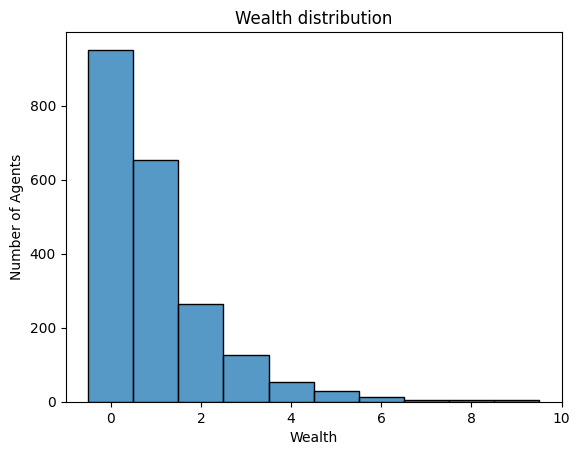

In [157]:
# Lets make sure the model works
model = MoneyModel(100, 10, 10)
for _ in range(20):
    model.step()


data = model.datacollector.get_agent_vars_dataframe()
# Use seaborn
g = sns.histplot(data["Wealth"], discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="Number of Agents");

In [192]:
import solara
from matplotlib.figure import Figure


from mesa.visualization.utils import update_counter

In [186]:
def agent_portrayal(agent):
    size = 10
    color = "tab:red"
    if agent.wealth > 0:
        size = 50
        color = "tab:blue"
    return {"size": size, "color": color}


model_params = {
    "n": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 10,
    "height": 10,
}

In [187]:
plot_comp = make_plot_component("encoding", page=1)

In [193]:
@solara.component
def Histogram(model):
    update_counter.get()  # This is required to update the counter
    # Note: you must initialize a figure using this method instead of
    # plt.figure(), for thread safety purpose
    fig = Figure()
    ax = fig.subplots()
    wealth_vals = [agent.wealth for agent in model.agents]
    # Note: you have to use Matplotlib's OOP API instead of plt.hist
    # because plt.hist is not thread-safe.
    ax.hist(wealth_vals, bins=10)
    solara.FigureMatplotlib(fig)

def TotalWealth(model):
    total_wealth = sum(agent.wealth for agent in model.agents)
    fig = Figure()
    ax = fig.subplots()
    ax.bar(["Total Wealth"], [total_wealth])
    solara.FigureMatplotlib(fig)

In [194]:
# Create initial model instance
money_model = MoneyModel(n=50, width=10, height=10)

SpaceGraph = make_space_component(agent_portrayal)
GiniPlot = make_plot_component("Gini", page=1)

page = SolaraViz(
    money_model,
    components=[SpaceGraph, GiniPlot, (Histogram, 2), (TotalWealth, 3)],
    model_params=model_params,
    name="Boltzmann Wealth Model",
)
# This is required to render the visualization in the Jupyter notebook
page

Cannot show ipywidgets in text

In [195]:
# Has multi-dimensional arrays and matrices.
# Has a large collection of mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

# Data visualization tools.
import seaborn as sns

import mesa

# Import Cell Agent and OrthogonalMooreGrid
from mesa.discrete_space import CellAgent, OrthogonalMooreGrid

In [196]:
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.agents]
    x = sorted(agent_wealths)
    n = model.num_agents
    B = sum(xi * (n - i) for i, xi in enumerate(x)) / (n * sum(x))
    return 1 + (1 / n) - 2 * B


class MoneyAgent(CellAgent):
    """An agent with fixed initial wealth."""

    def __init__(self, model, cell):
        super().__init__(model)
        self.cell = cell
        self.wealth = 1
        self.steps_not_given = 0

    def move(self):
        self.cell = self.cell.neighborhood.select_random_cell()

    def give_money(self):
        cellmates = [a for a in self.cell.agents if a is not self]

        if len(cellmates) > 0 and self.wealth > 0:
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1
            self.steps_not_given = 0
        else:
            self.steps_not_given += 1


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n, width, height, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n
        self.grid = OrthogonalMooreGrid(
            (width, height), torus=True, capacity=10, random=self.random
        )
        # Instantiate DataCollector
        self.datacollector = mesa.DataCollector(
            model_reporters={"Gini": compute_gini},
            agent_reporters={"Wealth": "wealth", "Steps_not_given": "steps_not_given"},
        )
        self.running = True

        # Create agents
        agents = MoneyAgent.create_agents(
            self,
            self.num_agents,
            self.random.choices(self.grid.all_cells.cells, k=self.num_agents),
        )

    def step(self):
        # Collect data each step
        self.datacollector.collect(self)
        self.agents.shuffle_do("move")
        self.agents.do("give_money")

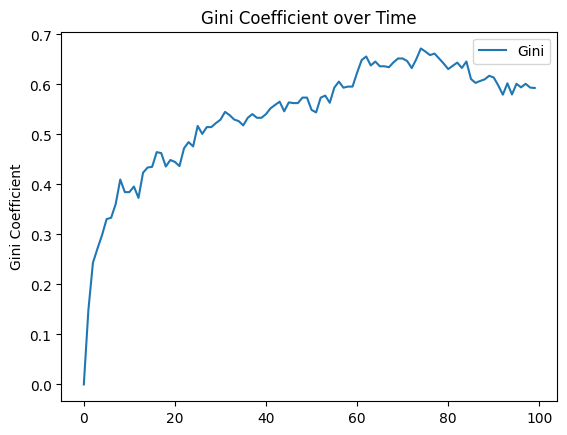

In [197]:
model = MoneyModel(100, 10, 10)
for _ in range(100):
    model.step()

gini = model.datacollector.get_model_vars_dataframe()
g = sns.lineplot(data=gini)
g.set(title="Gini Coefficient over Time", ylabel="Gini Coefficient");

In [260]:
import sys

rng = np.random.default_rng(42)
seed_values = rng.integers(0, sys.maxsize, size=(5,))
rng = seed_values.tolist()

In [303]:
params = {"width": 10, "height": 10, "n": range(5, 105, 5)}

results = mesa.batch_run(
    MoneyModel,
    parameters=params,
    iterations=5,
    max_steps=100,
    number_processes=1,
    data_collection_period=1,   
    display_progress=True,
)

  0%|          | 0/100 [00:00<?, ?it/s]

In [304]:
results_df = pd.DataFrame(results)
print(f"The results have {len(results)} rows.")
print(f"The columns of the data frame are {list(results_df.keys())}.")

The results have 525100 rows.
The columns of the data frame are ['RunId', 'iteration', 'Step', 'width', 'height', 'n', 'Gini', 'AgentID', 'Wealth', 'Steps_not_given'].


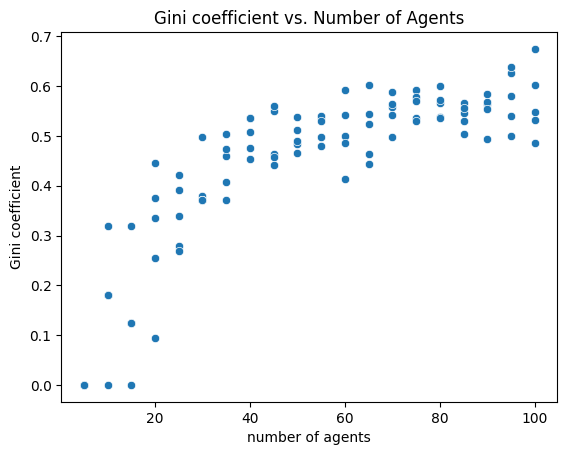

In [305]:
# Filter the results to only contain the data of one agent
# The Gini coefficient will be the same for the entire population at any time
results_filtered = results_df[(results_df.AgentID == 1) & (results_df.Step == 100)]
results_filtered[["iteration", "n", "Gini"]].reset_index(
    drop=True
).head()  # Create a scatter plot
g = sns.scatterplot(data=results_filtered, x="n", y="Gini")
g.set(
    xlabel="number of agents",
    ylabel="Gini coefficient",
    title="Gini coefficient vs. Number of Agents",
);

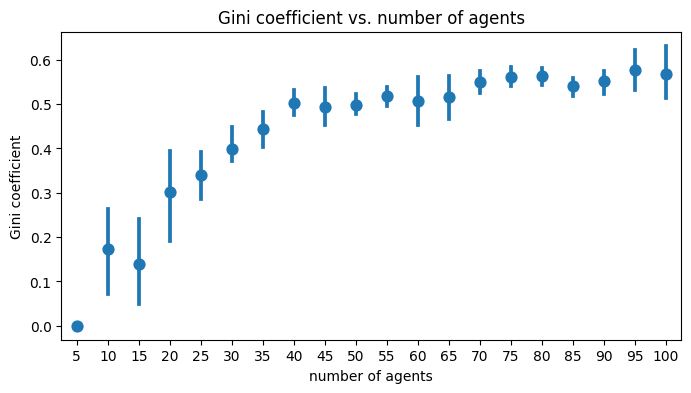

In [306]:
# Create a point plot with error bars
g = sns.pointplot(data=results_filtered, x="n", y="Gini", linestyle="None")
g.figure.set_size_inches(8, 4)
g.set(
    xlabel="number of agents",
    ylabel="Gini coefficient",
    title="Gini coefficient vs. number of agents",
);

In [307]:
# First, we filter the results
one_episode_wealth = results_df[(results_df.n == 10) & (results_df.iteration == 2)]
# Then, print the columns of interest of the filtered data frame
print(
    one_episode_wealth.to_string(
        index=False, columns=["Step", "AgentID", "Wealth"], max_rows=10
    )
)
# For a prettier display we can also convert the data frame to html
# Uncomment the two lines below to test in Jupyter
# from IPython.display import display, HTML
# display(HTML(one_episode_wealth.to_html(index=False, columns=['Step',
# 'AgentID', 'Wealth'], max_rows=25)))

 Step  AgentID  Wealth
    0      NaN     NaN
    1      1.0     1.0
    1      2.0     1.0
    1      3.0     1.0
    1      4.0     1.0
  ...      ...     ...
  100      6.0     1.0
  100      7.0     1.0
  100      8.0     1.0
  100      9.0     1.0
  100     10.0     1.0


In [308]:
results_one_episode = results_df[
    (results_df.n == 10) & (results_df.AgentID == 1) & (results_df.iteration == 2)
]
print(results_one_episode.to_string(index=False, columns=["Step", "Gini"], max_rows=10))

 Step  Gini
    1  0.00
    2  0.00
    3  0.00
    4  0.00
    5  0.00
  ...   ...
   96  0.18
   97  0.18
   98  0.18
   99  0.18
  100  0.18


In [309]:
# Has multi-dimensional arrays and matrices.
# Has a large collection of mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

# Data visualization tools.
import seaborn as sns

import mesa

# Import Cell Agent and OrthogonalMooreGrid
from mesa.discrete_space import CellAgent, OrthogonalMooreGrid

In [310]:
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.agents]
    x = sorted(agent_wealths)
    n = model.num_agents
    B = sum(xi * (n - i) for i, xi in enumerate(x)) / (n * sum(x))
    return 1 + (1 / n) - 2 * B


class MoneyAgent(CellAgent):
    """An agent with fixed initial wealth."""

    def __init__(self, model, cell):
        super().__init__(model)
        self.cell = cell
        self.wealth = 1
        self.steps_not_given = 0

    def move(self):
        self.cell = self.cell.neighborhood.select_random_cell()

    def give_money(self):
        cellmates = [a for a in self.cell.agents if a is not self]

        if len(cellmates) > 0 and self.wealth > 0:
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1
            self.steps_not_given = 0
        else:
            self.steps_not_given += 1


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n, width, height, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n
        self.grid = OrthogonalMooreGrid(
            (width, height), torus=True, capacity=10, random=self.random
        )
        # Instantiate DataCollector
        self.datacollector = mesa.DataCollector(
            model_reporters={"Gini": compute_gini},
            agent_reporters={"Wealth": "wealth", "Steps_not_given": "steps_not_given"},
        )
        self.running = True

        # Create agents
        agents = MoneyAgent.create_agents(
            self,
            self.num_agents,
            self.random.choices(self.grid.all_cells.cells, k=self.num_agents),
        )

    def step(self):
        # Collect data each step
        self.datacollector.collect(self)
        self.agents.shuffle_do("move")
        self.agents.do("give_money")

In [311]:
params = {"width": 10, "height": 10, "n": range(5, 105, 5)}

results = mesa.batch_run(
    MoneyModel,
    parameters=params,
    iterations=5,
    max_steps=100,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

  0%|          | 0/100 [00:00<?, ?it/s]

In [312]:
results_df = pd.DataFrame(results)
print(f"The results have {len(results)} rows.")
print(f"The columns of the data frame are {list(results_df.keys())}.")

The results have 525100 rows.
The columns of the data frame are ['RunId', 'iteration', 'Step', 'width', 'height', 'n', 'Gini', 'AgentID', 'Wealth', 'Steps_not_given'].


In [328]:
params = {"width": 10, "height": 10, "n": range(5, 105, 5)}

results = mesa.batch_run(
    MoneyModel,
    parameters=params,
    iterations=5,
    max_steps=100,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

  0%|          | 0/100 [00:00<?, ?it/s]

In [329]:
results_df = pd.DataFrame(results)
print(f"The results have {len(results)} rows.")
print(f"The columns of the data frame are {list(results_df.keys())}.")

The results have 525100 rows.
The columns of the data frame are ['RunId', 'iteration', 'Step', 'width', 'height', 'n', 'Gini', 'AgentID', 'Wealth', 'Steps_not_given'].


In [337]:
params = {"seed": None, "width": 10, "height": 10, "n": [5, 10, 20, 40, 80]}

results_5s = mesa.batch_run(
    MoneyModel,
    parameters=params,
    iterations=25,
    max_steps=100,
    number_processes=1,
    data_collection_period=1,  # Need to collect every step
    display_progress=True,
)

results_5s_df = pd.DataFrame(results_5s)

  0%|          | 0/125 [00:00<?, ?it/s]

In [338]:
# The Gini coefficient will be the same for the entire population at any time.
results_5s_df_filtered = results_5s_df[(results_5s_df.AgentID == 1)]
results_5s_df_filtered.head(3)

,RunId,iteration,Step,seed,width,height,n,Gini,AgentID,Wealth,Steps_not_given
1,0,0,1,None,10,10,5,0.0,1.0,1.0,0.0
6,0,0,2,None,10,10,5,0.0,1.0,1.0,1.0
11,0,0,3,None,10,10,5,0.0,1.0,1.0,2.0


In [334]:
params = {"seed": rng, "width": 10, "height": 10, "n": 80}

results_5s = mesa.batch_run(
    MoneyModel,
    parameters=params,
    iterations=25,
    max_steps=100,
    number_processes=1,
    data_collection_period=1,  # Need to collect every step
    display_progress=True,
)

results_5s_df = pd.DataFrame(results_5s)

  0%|          | 0/125 [00:00<?, ?it/s]

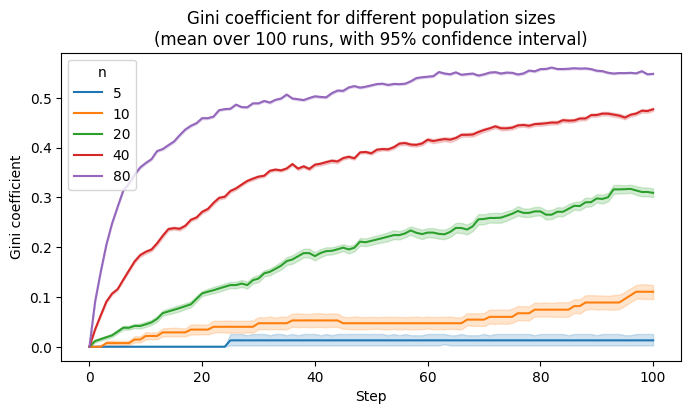

In [332]:
# Create a lineplot with error bars
g = sns.lineplot(
    data=results_5s_df,
    x="Step",
    y="Gini",
    hue="n",
    errorbar=("ci", 95),
    palette="tab10",
)
g.figure.set_size_inches(8, 4)
plot_title = (
    "Gini coefficient for different population sizes\n"
    "(mean over 100 runs, with 95% confidence interval)"
)
g.set(title=plot_title, ylabel="Gini coefficient");

In [335]:
# The Gini coefficient will be the same for the entire population at any time.
results_5s_df_filtered = results_5s_df[(results_5s_df.AgentID == 1)]
results_5s_df_filtered.head(3)

,RunId,iteration,Step,seed,width,height,n,Gini,AgentID,Wealth,Steps_not_given
1,0,0,1,7138484576005690179,10,10,80,0.072187,1.0,1.0,0.0
81,0,0,2,7138484576005690179,10,10,80,0.180000,1.0,1.0,1.0
161,0,0,3,7138484576005690179,10,10,80,0.237187,1.0,1.0,2.0


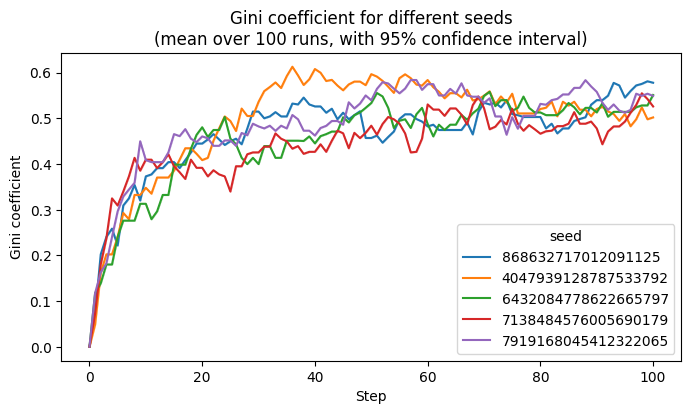

In [336]:
# Create a lineplot with error bars
g = sns.lineplot(
    data=results_5s_df,
    x="Step",
    y="Gini",
    hue="seed",
    errorbar=("ci", 95),
    palette="tab10",
)
g.figure.set_size_inches(8, 4)
plot_title = (
    "Gini coefficient for different seeds\n"
    "(mean over 100 runs, with 95% confidence interval)"
)
g.set(title=plot_title, ylabel="Gini coefficient");

In [339]:
# Calculate the mean of the wealth and the number of consecutive rounds
# for all agents in each episode.
agg_results_df = (
    results_5s_df.groupby(["iteration", "n", "Step"])
    .agg({"Wealth": "mean", "Steps_not_given": "mean"})
    .reset_index()
)
agg_results_df.head(3)

,iteration,n,Step,Wealth,Steps_not_given
0,0,5,0,NaN,NaN
1,0,5,1,1.0,0.0
2,0,5,2,1.0,1.0


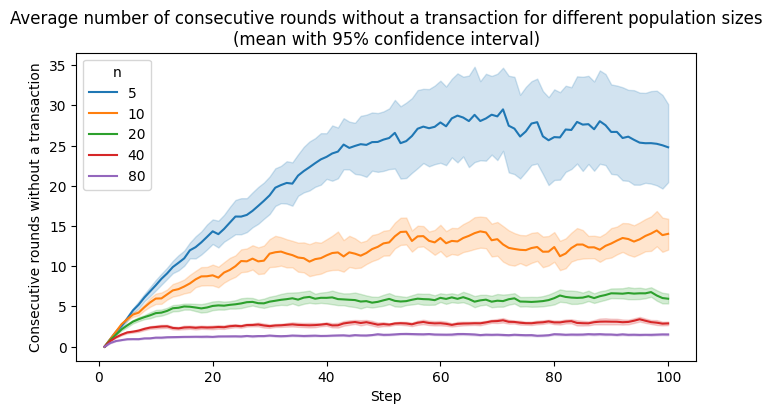

In [340]:
# Create a line plot with error bars
g = sns.lineplot(
    data=agg_results_df, x="Step", y="Steps_not_given", hue="n", palette="tab10"
)
g.figure.set_size_inches(8, 4)
g.set(
    title="Average number of consecutive rounds without a transaction for "
    "different population sizes\n(mean with 95% confidence interval)",
    ylabel="Consecutive rounds without a transaction",
);